In [110]:
import pandas as pd

import ipywidgets as ipw
from ipywidgets import interact

from IPython.display import display

from matplotlib import pyplot as plt
from matplotlib import rc

import numpy as np

import json

from datetime import datetime

from urllib.request import urlretrieve

import warnings
warnings.filterwarnings('ignore')

In [111]:
# Get data
national_data_url = 'https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-json/dpc-covid19-ita-andamento-nazionale.json';
national_data_file = 'dpc-covid19-ita-andamento-nazionale.json';
urlretrieve(national_data_url, national_data_file);

regional_data_url = 'https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-json/dpc-covid19-ita-regioni.json';
regional_data_file = 'dpc-covid19-ita-regioni.json';
urlretrieve(regional_data_url, regional_data_file);

url_province_data = 'https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-json/dpc-covid19-ita-province.json';
province_data_file = 'dpc-covid19-ita-province.json';
urlretrieve(url_province_data, province_data_file);

In [112]:
# Get regions names
regions = pd.read_json(regional_data_file)
regions = list(dict.fromkeys(regions.denominazione_regione))
regions = sorted(regions)

# Get provinces names
provinces = pd.read_json(province_data_file)
provinces = list(dict.fromkeys(provinces.denominazione_provincia))
provinces = sorted(provinces)

In [113]:
# Get population of regions and provinces
population = pd.read_csv('popolazione.csv')
population = dict(zip(population.Territorio, population.Value))

In [114]:
def date_label(str_date):
    date = datetime.strptime(str_date, '%Y-%m-%dT%H:%M:%S')
    return str(date.day) + '/' + str(date.month)

def get_last_update():
    with open(regional_data_file) as f:
        json_str = f.read()
    regions_DATA = json.loads(json_str)
    return regions_DATA[-1]["data"]

get_last_update()

'2020-11-07T17:00:00'

## Italy

In [115]:
def show_nation(size = 30):
    national_data = pd.read_json(national_data_file)
    
    pop = 60244639
    df = national_data.tail(size)
    
    x = [date_label(str_date) for str_date in df['data']]
    y_tot = df['totale_positivi']
    y_test = df['casi_testati']
    y_tamp = df['tamponi']
    y_sick = df['ricoverati_con_sintomi']
    y_teri = df['terapia_intensiva']
    y_died = df['deceduti']
    
    print('positivi (ultimo dato)')
    print(np.array(df['nuovi_positivi'])[-1])
    print('terapia intensiva (ultimo dato)')
    print(np.array(y_teri)[-1])
    
    # time-relative values
    d_tot = df['nuovi_positivi']
    d_test = [a - b for a, b in zip(df['casi_testati'], df['casi_testati'].shift())]
    d_tamp = [a - b for a, b in zip(df['tamponi'], df['tamponi'].shift())]
    d_sick = [a - b for a, b in zip(df['ricoverati_con_sintomi'], df['ricoverati_con_sintomi'].shift())]
    d_teri = [a - b for a, b in zip(df['terapia_intensiva'], df['terapia_intensiva'].shift())]
    d_died = [a - b for a, b in zip(df['deceduti'], df['deceduti'].shift())]

    y_perc1 = d_tot / d_test * 100
    y_perc2 = d_tot / d_tamp * 100
    y_percT = np.array(d_tot) / pop * 1000000 
    y_perc3 = np.array(d_test) / pop * 1000000
    y_perc4 = np.array(d_tamp) / pop * 1000000
    y_perc5 = np.array(d_sick) / pop * 1000000
    y_perc6 = np.array(d_teri) / pop * 1000000
    y_perc7 = np.array(d_died) / pop * 1000000
    
    # plot
    fig, axes = plt.subplots(2,3, figsize=(16,8))
    plt.tight_layout()
    
    axes[0,0].set_title("positivi/test %")
    axes[0,0].fill_between(x, y_perc1, y_perc2, color='green')
    
    axes[0,1].set_title("positivi/10^6 ab")
    axes[0,1].plot(x, y_percT, color='red')
    axes[0,1].grid(True)
    
    axes[0,2].set_title("ricoverati/10^6 ab")
    axes[0,2].plot(x, y_perc5, color='blue')
    axes[0,2].grid(True)

    axes[1,0].set_title("terapia_i/10^6 ab")
    axes[1,0].plot(x, y_perc6, color='grey')
    axes[1,0].grid(True)
    
    axes[1,1].set_title("morti/10^6 ab")
    axes[1,1].plot(x, y_perc7, color='black')
    axes[1,1].grid(True)

positivi (ultimo dato)
39811
terapia intensiva (ultimo dato)
2634


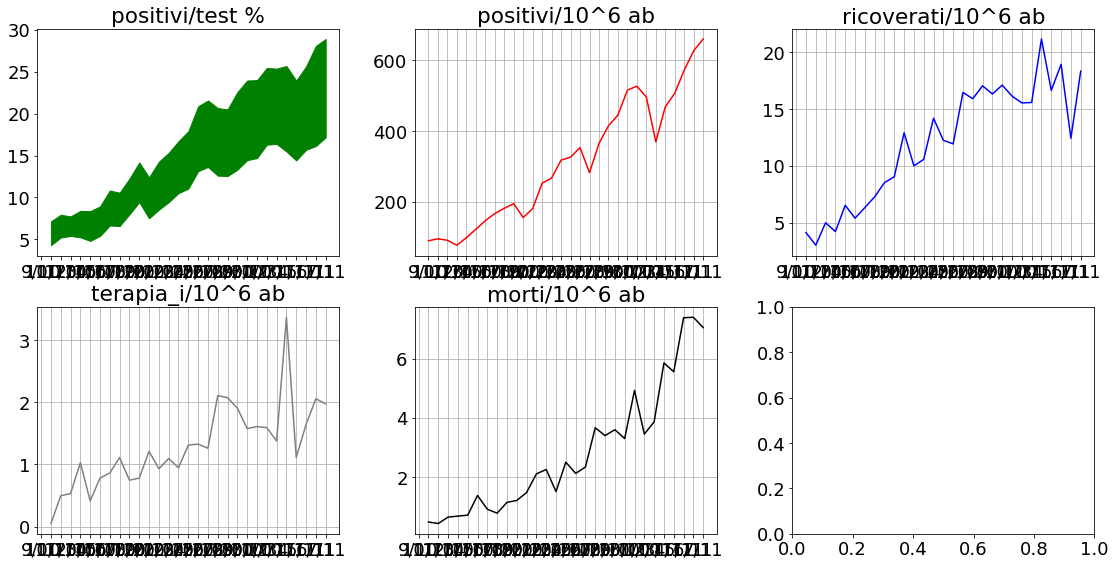

In [116]:
show_nation()

## Regions

In [117]:
def show_region(regionName, size = 30):
    if regionName not in regions:
        return
    
    with open(regional_data_file) as f:
        json_str = f.read()
    regions_data = json.loads(json_str)
    region_data = []

    for entry in regions_data:
        if entry['denominazione_regione'] == regionName:
            region_data.append(entry)
    
    pop = population[regionName]
    df = pd.DataFrame(region_data).tail(size)
    
    x = [date_label(str_date) for str_date in df['data']]
    y_tot = df['totale_positivi']
    y_test = df['casi_testati']
    y_tamp = df['tamponi']
    y_sick = df['ricoverati_con_sintomi']
    y_died = df['deceduti']
    
    # time-relative values
    d_tot = df['nuovi_positivi']
    d_test = [a - b for a, b in zip(df['casi_testati'], df['casi_testati'].shift())]
    d_tamp = [a - b for a, b in zip(df['tamponi'], df['tamponi'].shift())]
    d_sick = [a - b for a, b in zip(df['ricoverati_con_sintomi'], df['ricoverati_con_sintomi'].shift())]
    d_died = [a - b for a, b in zip(df['deceduti'], df['deceduti'].shift())]
    r_died = [a / b for a, b in zip(d_died, d_tot.shift(10))]
    
    print(f'positivi: {np.array(d_tot)[-1]}')
    print(f'morti: {d_died}')

    y_perc1 = d_tot / d_test * 100
    y_perc2 = d_tot / d_tamp * 100
    y_percT = np.array(d_tot) / pop * 1000000 
    y_perc3 = np.array(d_test) / pop * 1000000
    y_perc4 = np.array(d_tamp) / pop * 1000000
    y_perc5 = np.array(d_sick) / pop * 1000000
    y_perc6 = np.array(d_died) / pop * 1000000
    y_r_died = np.array(r_died) * 100
    
    #    Make the plot
    fig, axes = plt.subplots(2,3, figsize=(16,8))
    plt.tight_layout()
    
    axes[0,0].set_title("positivi/test %")
    axes[0,0].fill_between(x, y_perc1, y_perc2, color='green')
    
    axes[0,1].set_title("tamponi/10^6 ab")
    axes[0,1].plot(x, y_perc4, color='green')
    axes[0,1].grid(True)

    axes[0,2].set_title("positivi/10^6 ab")
    axes[0,2].plot(x, y_percT, color='red')
    axes[0,2].grid(True)

    axes[1,0].set_title("ricoverati/10^6 ab")
    axes[1,0].plot(x, y_perc5, color='blue')
    axes[1,0].grid(True)
    
    axes[1,1].set_title("morti/10^6 ab")
    axes[1,1].plot(x, y_perc6, color='black')
    axes[1,1].grid(True)

    axes[1,2].set_title("morti/positivi %")
    axes[1,2].plot(x, y_r_died, color='black')
    axes[1,2].grid(True)


positivi: 2009
morti: [nan, 1.0, 2.0, 4.0, 1.0, 1.0, 5.0, 6.0, 3.0, 5.0, 8.0, 6.0, 10.0, 10.0, 4.0, 3.0, 15.0, 14.0, 8.0, 11.0, 19.0, 16.0, 17.0, 23.0, 12.0, 13.0, 40.0, 29.0]


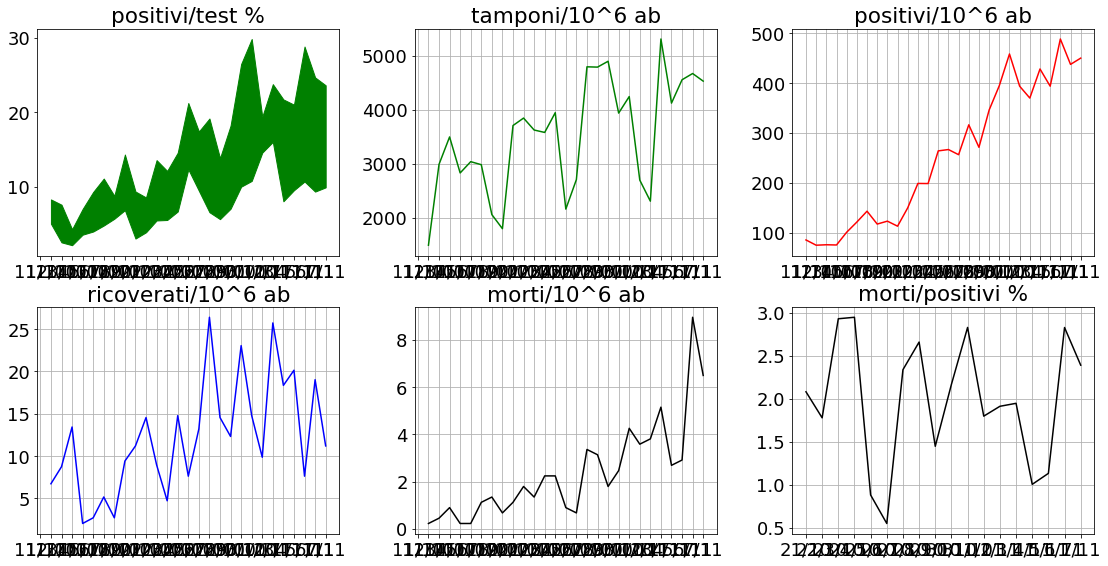

In [118]:
show_region("Emilia-Romagna", 28)

positivi: 1092
morti: [nan, 2.0, 1.0, 1.0, 3.0, 6.0, 1.0, 3.0, 5.0, 6.0, 9.0, 17.0, 7.0, 6.0, 5.0, 13.0, 14.0, 15.0, 9.0, 7.0, 25.0, 7.0, 9.0, 20.0, 24.0, 29.0, 16.0, 35.0]


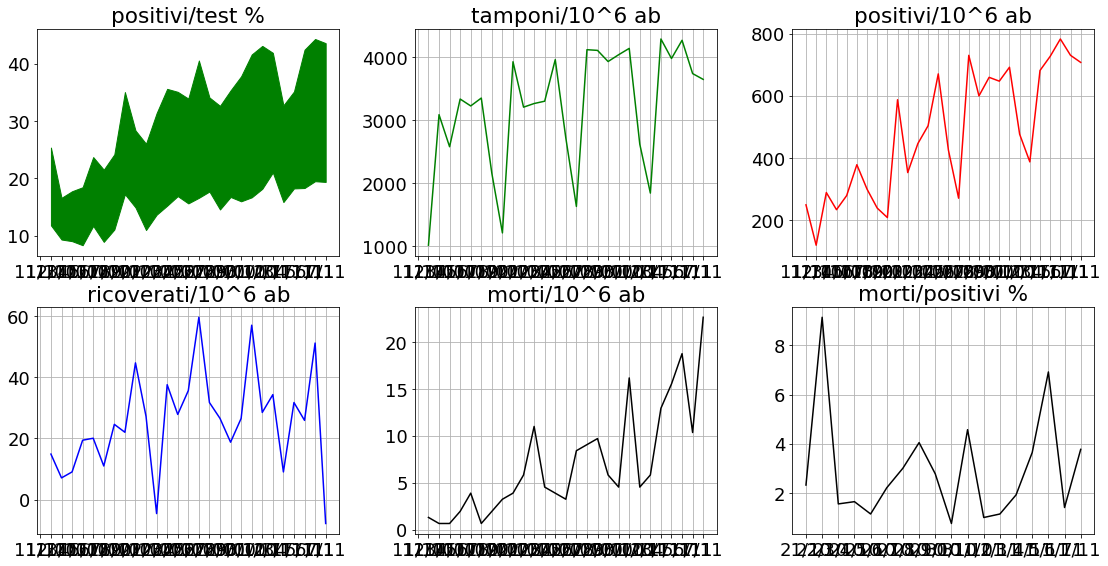

In [119]:
show_region("Liguria", 28)

positivi: 2787
morti: [nan, 6.0, 1.0, 2.0, 2.0, 2.0, 2.0, 5.0, 12.0, 2.0, 13.0, 8.0, 8.0, 11.0, 14.0, 13.0, 15.0, 7.0, 13.0, 10.0, 25.0, 18.0, 24.0, 16.0, 42.0, 25.0, 32.0, 30.0]


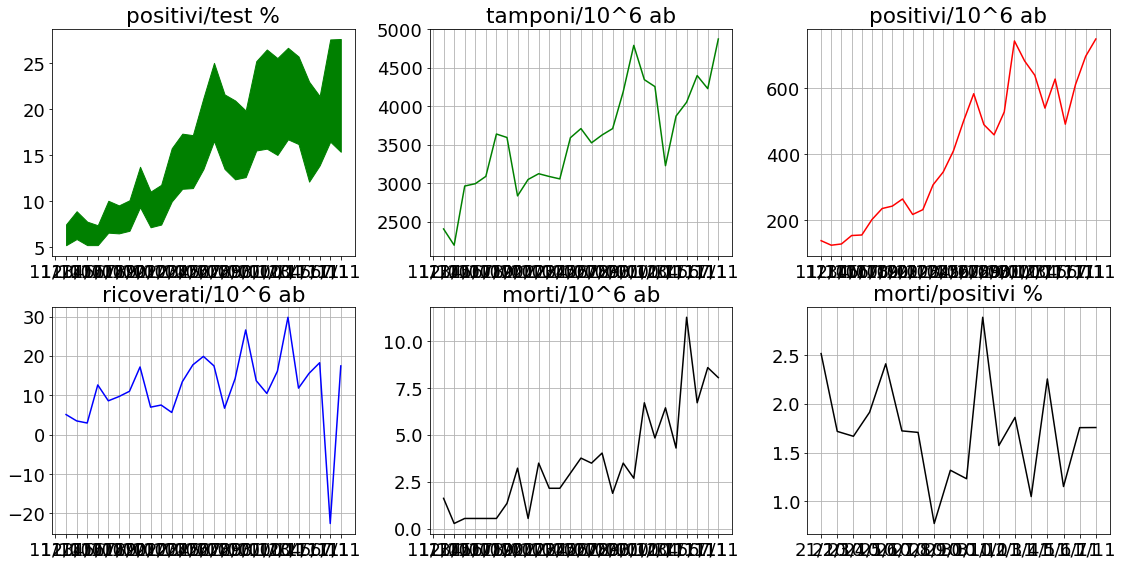

In [120]:
show_region("Toscana", 28)

positivi: 11489
morti: [nan, 3.0, 6.0, 17.0, 26.0, 7.0, 13.0, 21.0, 6.0, 19.0, 20.0, 29.0, 7.0, 51.0, 25.0, 17.0, 58.0, 47.0, 57.0, 48.0, 73.0, 54.0, 46.0, 117.0, 96.0, 139.0, 131.0, 108.0]


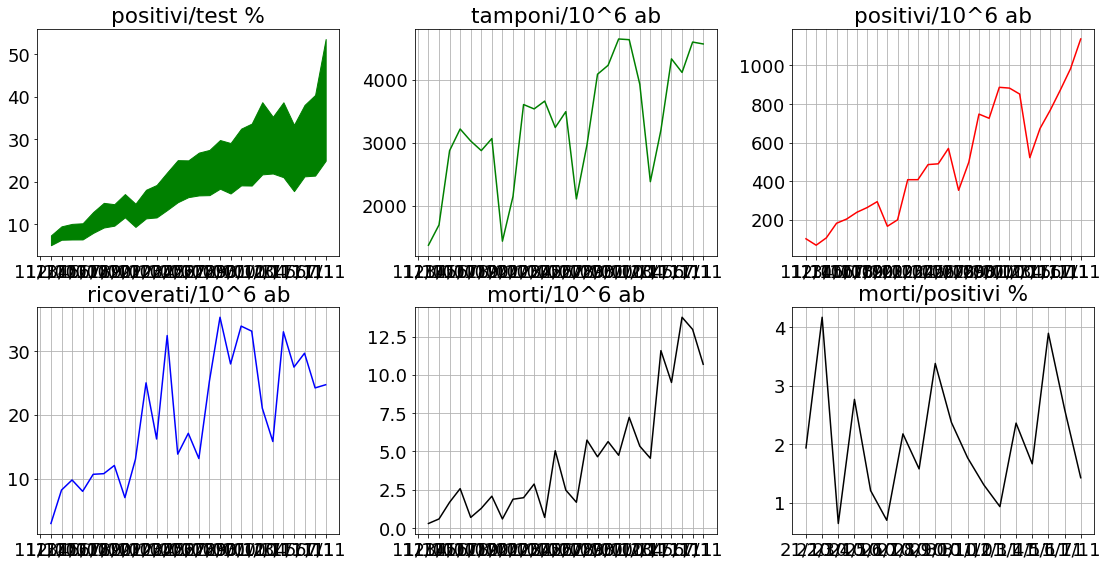

In [121]:
show_region("Lombardia", 28)

positivi: 4309
morti: [nan, 0.0, 6.0, 2.0, 9.0, 3.0, 0.0, 2.0, 21.0, 12.0, 11.0, 6.0, 12.0, 8.0, 0.0, 16.0, 20.0, 17.0, 20.0, 15.0, 14.0, 3.0, 24.0, 24.0, 15.0, 17.0, 40.0, 15.0]


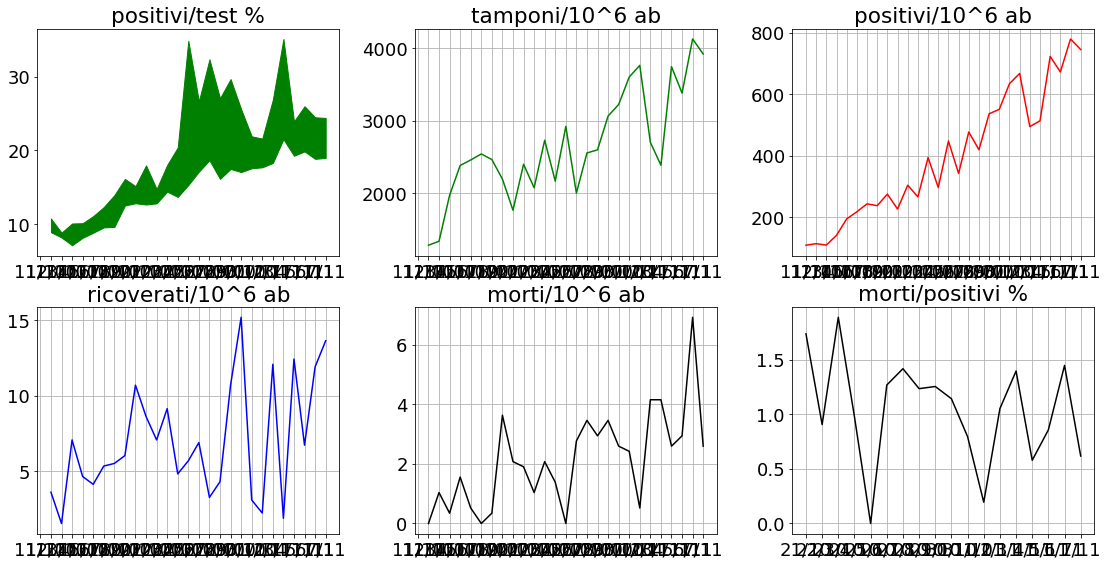

In [122]:
show_region("Campania", 28)

positivi: 1054
morti: [nan, 6.0, 2.0, 2.0, 7.0, 5.0, 2.0, 3.0, 4.0, 3.0, 2.0, 1.0, 1.0, 10.0, 7.0, 10.0, 13.0, 13.0, 7.0, 7.0, 10.0, 8.0, 9.0, 13.0, 10.0, 26.0, 13.0, 14.0]


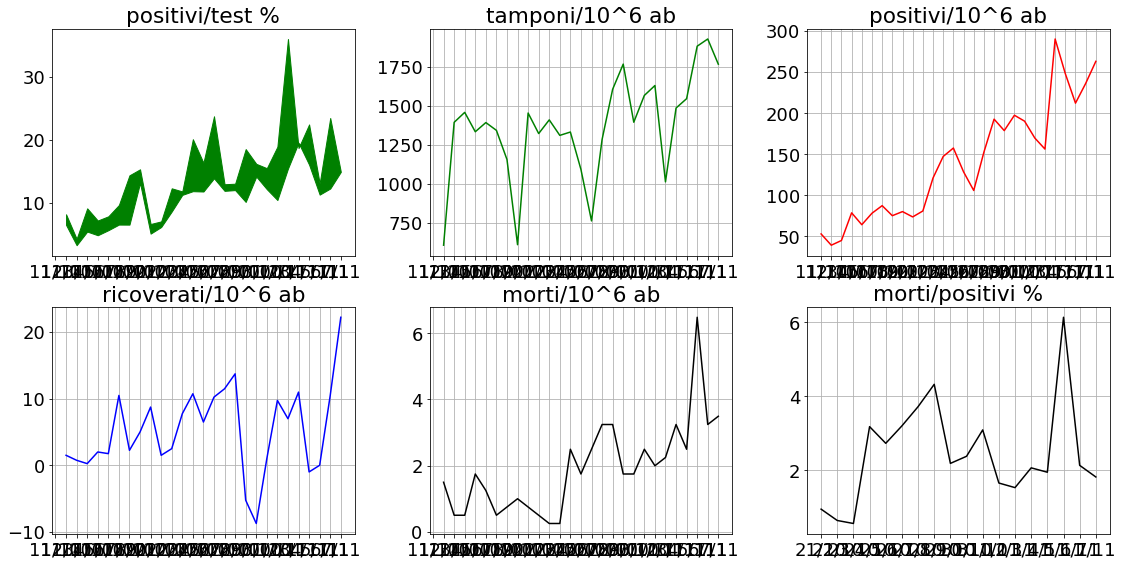

In [123]:
show_region("Puglia", 28)

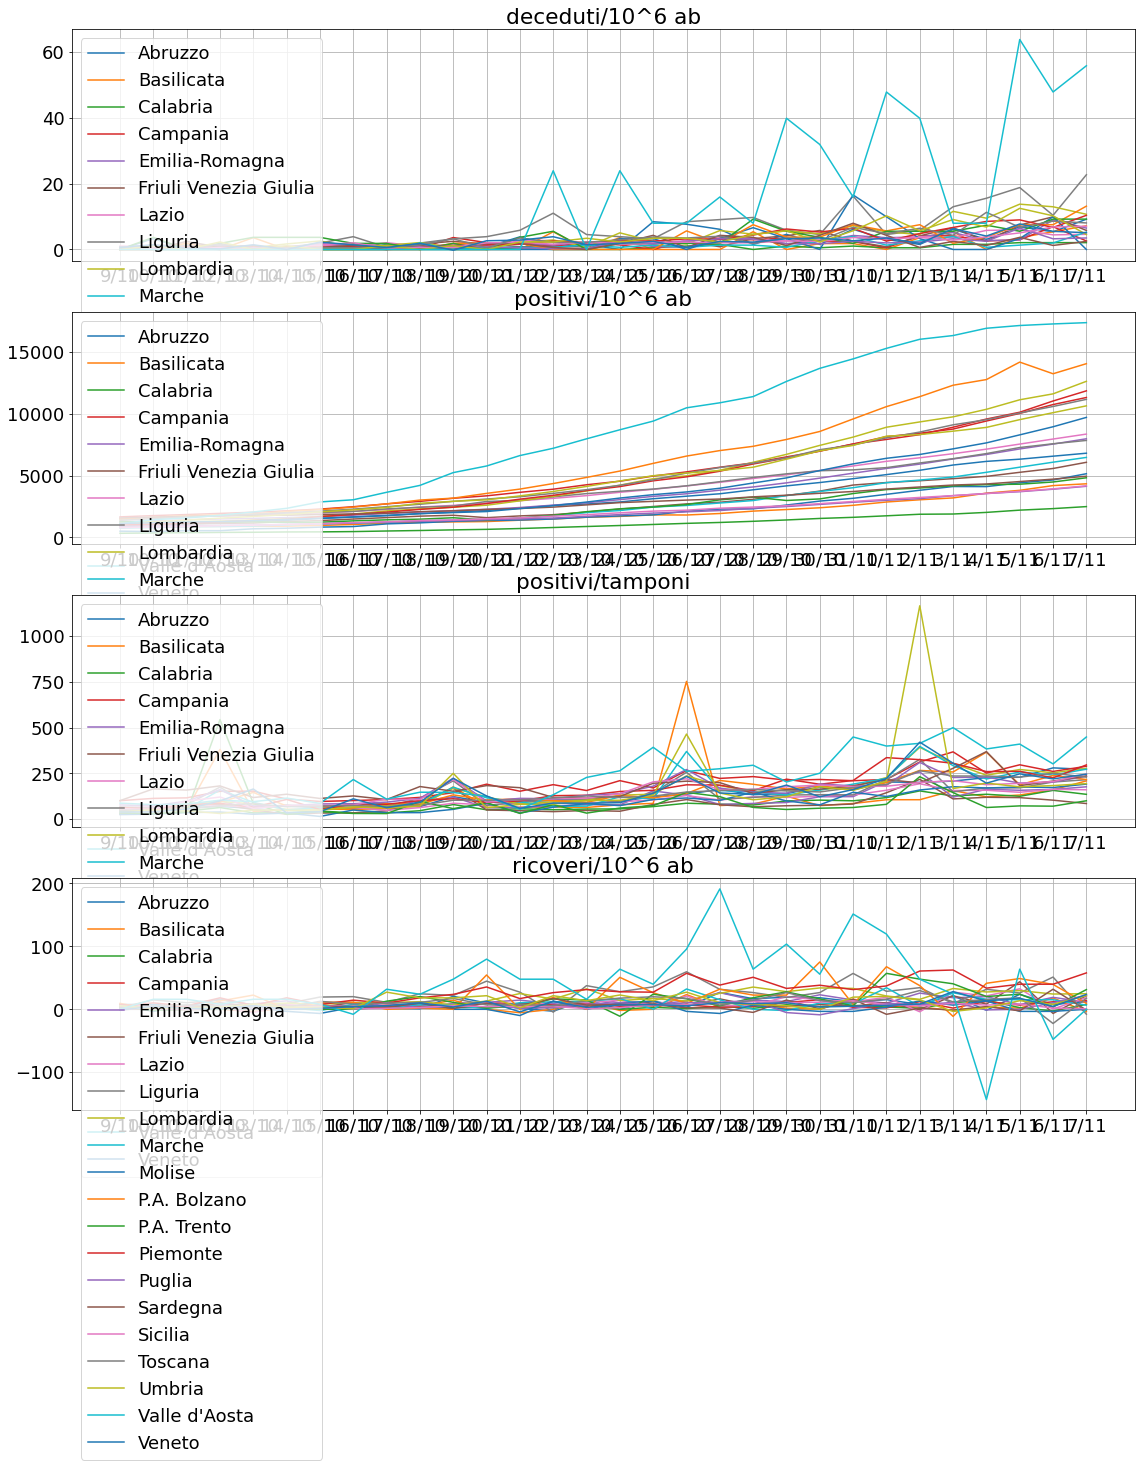

In [124]:
def compare(regionNames = regions, size = 30):
    regions_data = pd.read_json(regional_data_file)

    regions_data['data'] = [date_label(date) for date in regions_data['data']]    
    regions_data['pop'] = [population[region] for region in regions_data['denominazione_regione']]

    tot_df = pd.DataFrame(regions_data)

    def compute(data, regionName):
        df = data[data.denominazione_regione == regionName]

        # time-relative values
        df['nuovi_testati'] = [a - b for a, b in zip(df['casi_testati'], df['casi_testati'].shift())]
        df['nuovi_tamponi'] = [a - b for a, b in zip(df['tamponi'], df['tamponi'].shift())]
        df['nuovi_ricoveri'] = [a - b for a, b in zip(df['ricoverati_con_sintomi'], df['ricoverati_con_sintomi'].shift())]
        df['nuovi_deceduti'] = [a - b for a, b in zip(df['deceduti'], df['deceduti'].shift())]
        
        df['nuovi_testati'] = df['totale_positivi'] / df['nuovi_testati'] * 100
        df['positivi_per_tamponi'] = df['totale_positivi'] / df['nuovi_tamponi'] * 100
        df['positivi_per_pop'] = df['totale_positivi'] / df['pop'] * 1000000 
        df['testati_per_pop'] = df['nuovi_testati'] / df['pop'] * 1000000 
        df['tamponi_per_pop'] = df['nuovi_tamponi'] / df['pop'] * 1000000 
        df['ricoveri_per_pop'] = df['nuovi_ricoveri'] / df['pop'] * 1000000 
        df['deceduti_per_pop'] = df['nuovi_deceduti'] / df['pop'] * 1000000 
        return df
    
    # plot
    fig, axes = plt.subplots(4,1, figsize=(16,16))
    plt.tight_layout()
    
    axes[0].set_title("deceduti/10^6 ab")
    axes[0].grid(True)
    for r in regionNames:
        df_region = compute(tot_df, r).tail(size)
        axes[0].plot(df_region['data'], df_region['deceduti_per_pop'])
    axes[0].legend(regionNames, loc=2)
    
    axes[1].set_title("positivi/10^6 ab")
    axes[1].grid(True)
    for r in regionNames:
        df_region = compute(tot_df, r).tail(size)
        axes[1].plot(df_region['data'], df_region['positivi_per_pop'])
    axes[1].legend(regionNames, loc=2)
    
    axes[2].set_title("positivi/tamponi")
    axes[2].grid(True)
    for r in regionNames:
        df_region = compute(tot_df, r).tail(size)
        axes[2].plot(df_region['data'], df_region['positivi_per_tamponi'])
    axes[2].legend(regionNames, loc=2)
    
    axes[3].set_title("ricoveri/10^6 ab")
    axes[3].grid(True)
    for r in regionNames:
        df_region = compute(tot_df, r).tail(size)
        axes[3].plot(df_region['data'], df_region['ricoveri_per_pop'])
    axes[3].legend(regionNames, loc=2)
    
compare()

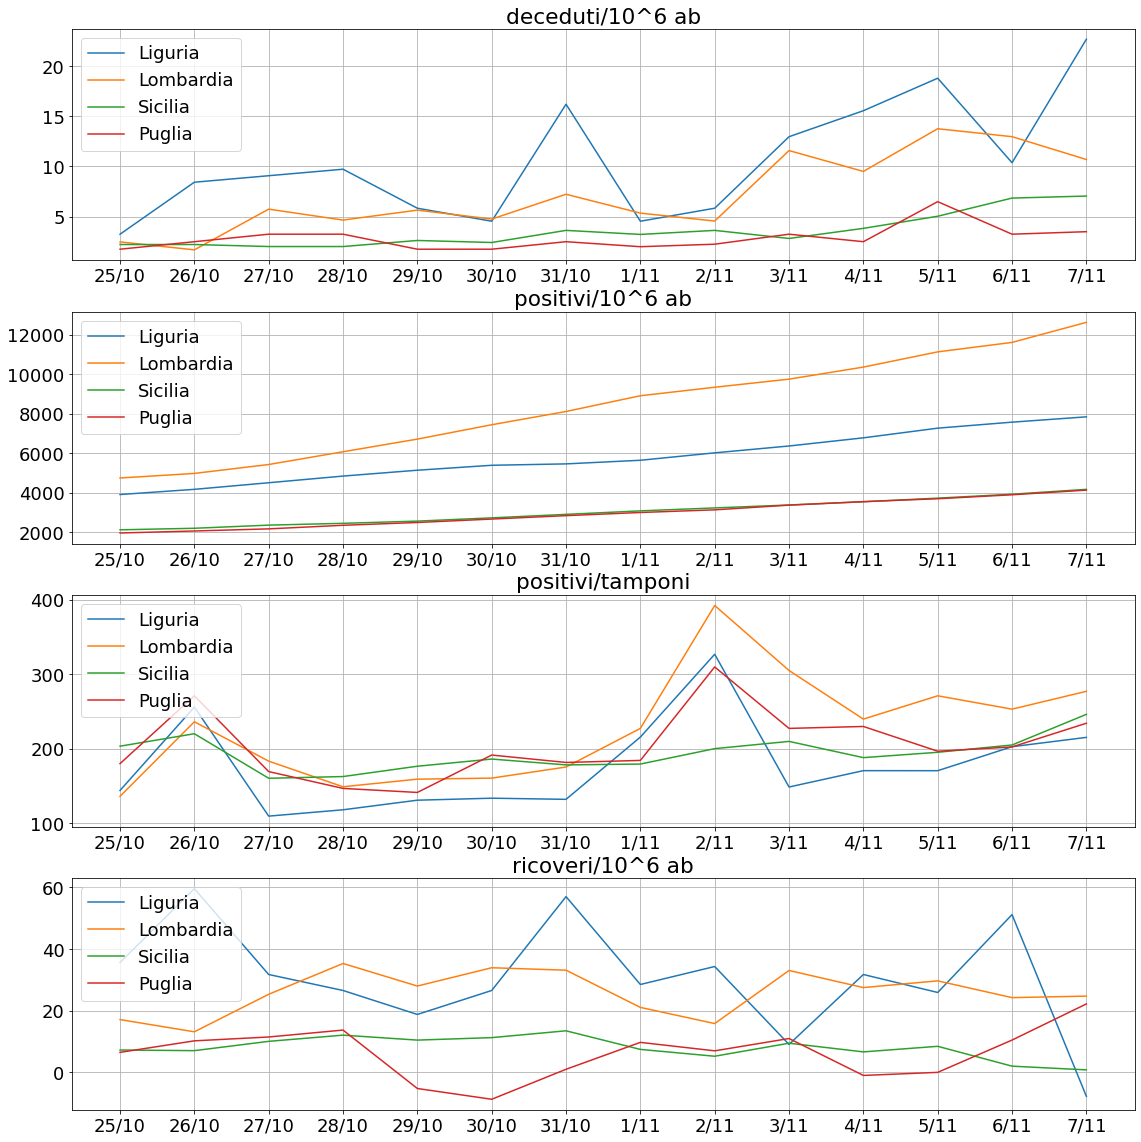

In [125]:
compare(['Liguria','Lombardia','Sicilia','Puglia'], 14)

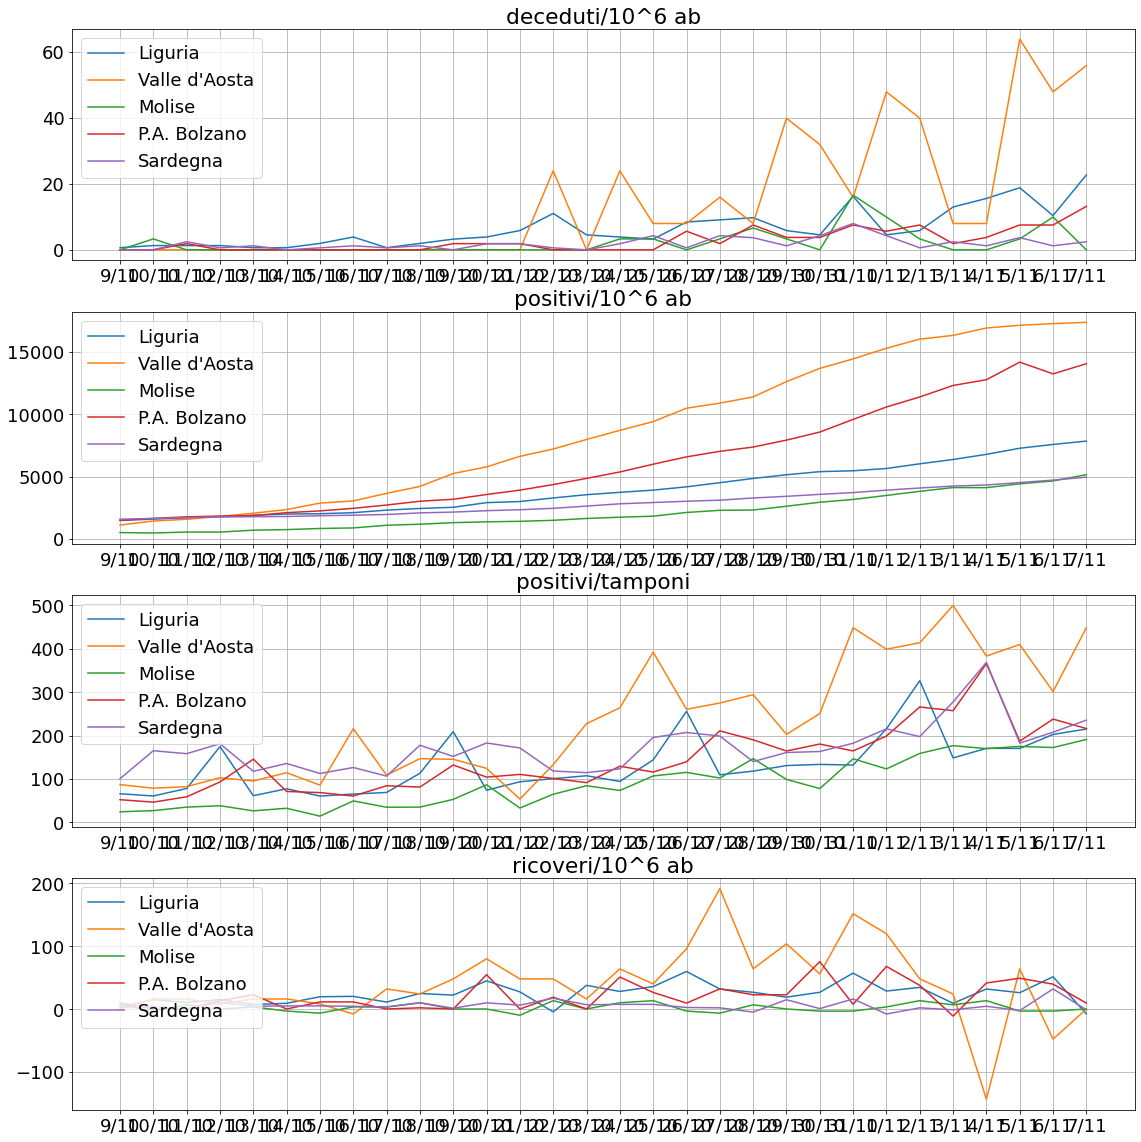

In [126]:
compare(['Liguria',"Valle d'Aosta",'Molise','P.A. Bolzano','Sardegna'])

In [127]:
region_selector = ipw.Combobox(
    options = regions,
    value = '',
    placeholder = 'Select a region',
    description = 'region ',
    disabled = False
)

In [128]:
interact(show_region, regionName=region_selector);

interactive(children=(Combobox(value='', description='region ', options=('Abruzzo', 'Basilicata', 'Calabria', …

## Provinces

In [129]:
def show_province(provinceName, size = 30):
    if provinceName not in provinces:
        return
    with open(province_data_file) as f:
        json_str = f.read()
    provinces_data = json.loads(json_str)
    province_data = []
    
    for entry in provinces_data:
        if entry['denominazione_provincia'] == provinceName:
            province_data.append(entry)
    
    pop = population[provinceName]
    df = pd.DataFrame(province_data).tail(size)

    x = [date_label(str_date) for str_date in df['data']]
    y_tot = df['totale_casi']
    
    # time-relative values
    d_tot = [a - b for a, b in zip(df['totale_casi'], df['totale_casi'].shift())]
    
    y_perc1 = np.array(d_tot) / pop * 100000
    
    print(f'positivi per popolazione {pop}')
    print(np.array(d_tot))
    
    #    Make the plot
    fig, axes = plt.subplots(1,1, figsize=(16,5))
    plt.tight_layout()

    axes.set_title("positivi/100k ab")
    axes.plot(x, y_perc1, color='red')
    axes.grid(True)

positivi per popolazione 394833
[ nan  54.  31.  20.  64.  46.  62.  62.  49.  33.  46.  74.  67.  74.
  98.  80.  96.  66.  86. 132. 121.  90. 112. 164.  80. 111.  80. 105.]


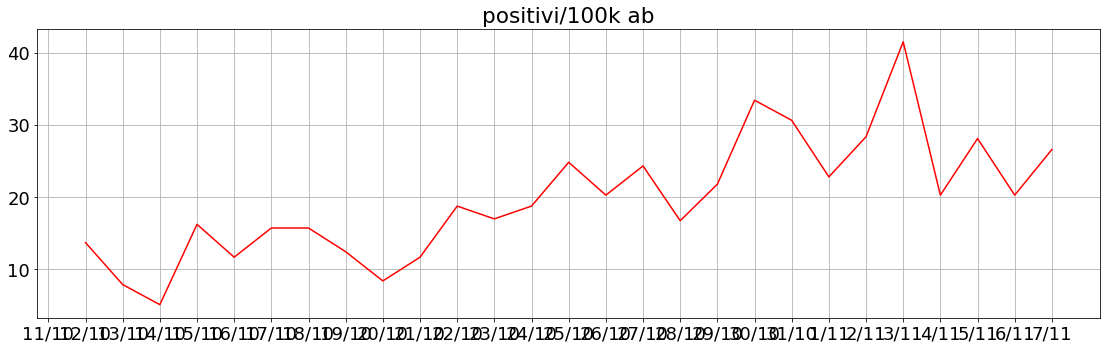

In [130]:
show_province("Forlì-Cesena", 28)

positivi per popolazione 219196
[ nan  25.  17.  33.  18.  30.  38.  67.  38.  27.  47.  54.  44.  91.
  72.  94. 127.  87. 146.  82. 184. 135.  81.  56.  97. 153. 172. 149.]


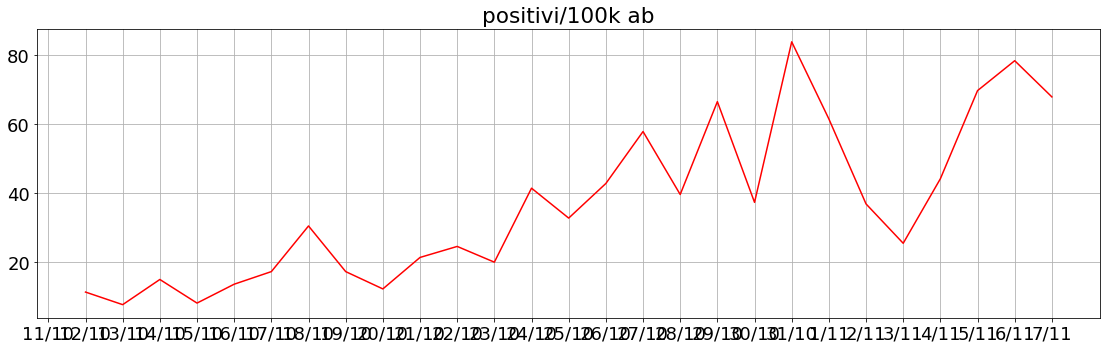

In [131]:
show_province("La Spezia", 28)

positivi per popolazione 835829
[ nan 116. 334. 263. 356. 363. 295. 198. 202. 729. 363. 498. 549. 730.
 376. 217. 857. 637. 583. 651. 695. 389. 387. 797. 722. 724. 632. 619.]


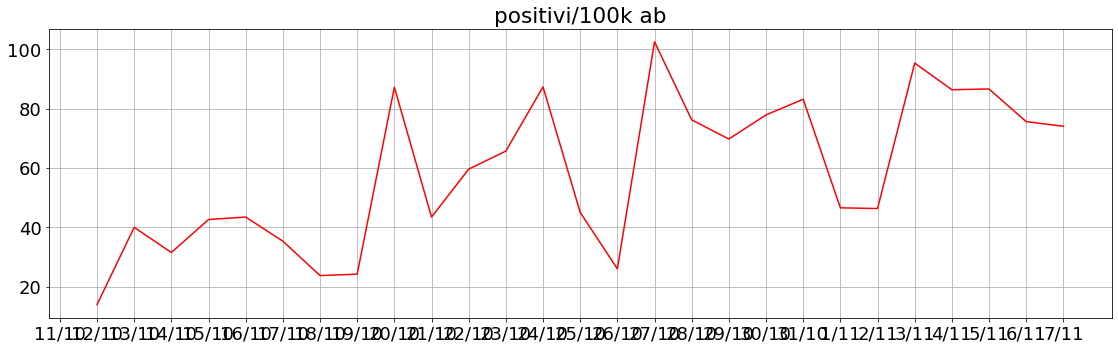

In [132]:
show_province("Genova", 28)

positivi per popolazione 3279944
[  nan  363.  440. 1032. 1053. 1319. 1388. 1463.  814. 1054. 1858. 2031.
 2399. 2306. 2589. 2023. 1940. 2708. 3211. 3979. 3730. 3695. 2242. 2829.
 3613. 3654. 4296. 4520.]


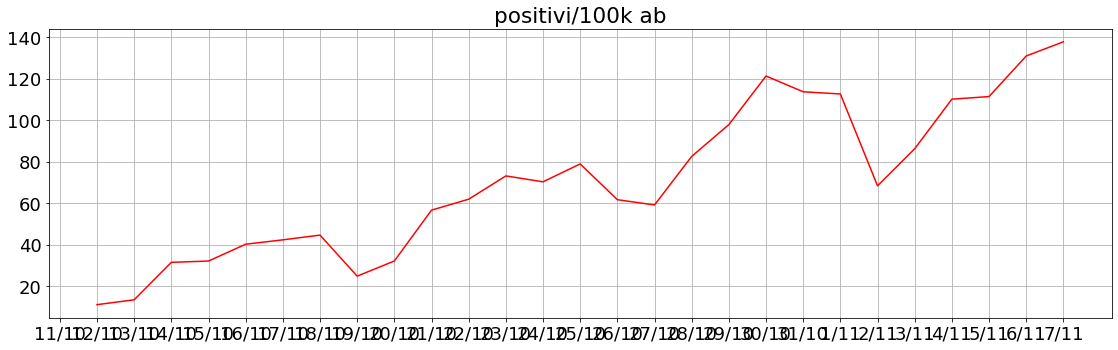

In [133]:
show_province("Milano", 28)

positivi per popolazione 4333274
[  nan  278.  362.  360.  457.  564.  604.  784.  711.  739.  806.  848.
  902.  976. 1377. 1131. 1359. 1381. 1379. 1754. 1678. 1726. 1368. 1693.
 1873. 2110.  918. 1925.]


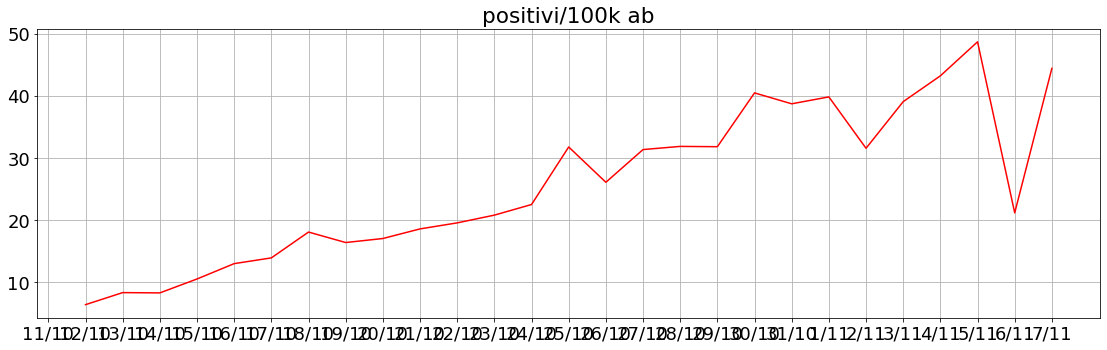

In [134]:
show_province("Roma", 28)

positivi per popolazione 3082905
[  nan  477.  470.  441.  766.  889.  750. 1009.  923.  976. 1406.  816.
 1268.  980. 2221.  781. 2210. 2008. 1624. 1882. 2353. 2431. 1818. 1571.
 1891. 1832. 2708. 3020.]


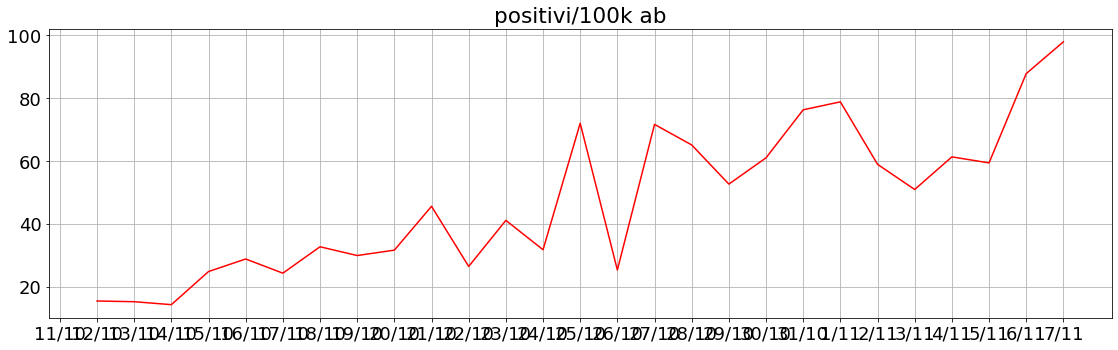

In [135]:
show_province("Napoli", 28)

In [136]:
province_selector = ipw.Combobox(
    options = provinces,
    value = '',
    placeholder = 'Select a province',
    description = 'province ',
    disabled = False
)

In [137]:
interact(show_province, provinceName=province_selector);

interactive(children=(Combobox(value='', description='province ', options=('Agrigento', 'Alessandria', 'Ancona…